## LangChain.SQL
###In this program we'll see how we can communicate we our DB in natural language using LangChain.sql

In [ ]:
pip install langchain_experimental langchain openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.5 MB/s eta 0:00:00


##### Import dependencies

In [ ]:
import os
from langchain.utilities import SQLDatabase
from langchain.llms import OpenAI
from langchain_experimental.sql import SQLDatabaseChain

##### Set up OpenAI API key and DB connection

In [ ]:
os.environ['OPENAI_API_KEY'] = "*****"
db = SQLDatabase.from_uri("sqlite:///chinook.db")

### We'll use SQLite sample database named chinook
####The following database diagram illustrates the chinook database tables and their relationships.

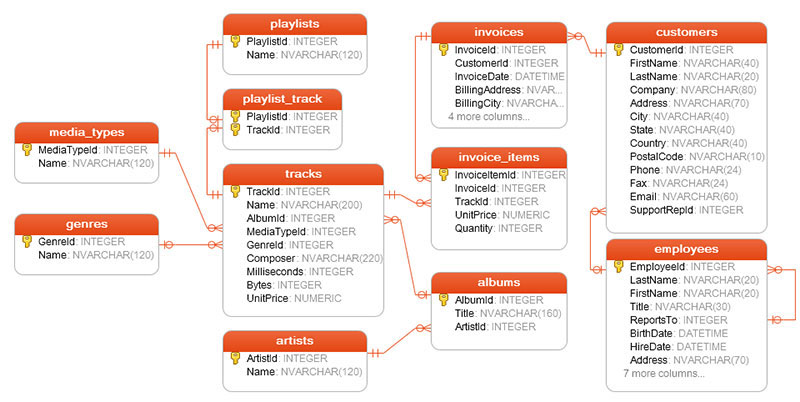

### Chinook sample database tables
####There are 11 tables in the chinook sample database.

 **employees** table stores employees data such as employee id, last name, first name, etc. It also has a field named ReportsTo to specify who reports to whom.

 **customers** table stores customers data.

**invoices & invoice_items tables:** these two tables store invoice data. The invoices table stores invoice header data and the invoice_items table stores the invoice line items data.

 **artists** table stores artists data. It is a simple table that contains only the artist id and name.

 **albums** table stores data about a list of tracks. Each album belongs to one artist. However, one artist may have multiple albums.

 **media_types** table stores media types such as MPEG audio and AAC audio files.

 **genres** table stores music types such as rock, jazz, metal, etc.

 **tracks** table stores the data of songs. Each track belongs to one album.

**playlists & playlist_track** tables: playlists table store data about playlists. Each playlist contains a list of tracks. Each track may belong to multiple playlists. The relationship between the playlists table and tracks table is many-to-many. The playlist_track table is used to reflect this relationship.

#### Create the model and connect between the model and our database

In [ ]:
llm = OpenAI(temperature=0.2, verbose=True)
db_chain = SQLDatabaseChain.from_llm(llm, db, verbose=True)

#### Create the prompt loop
#### press exit to quit

In [ ]:
def chat_with_sql():
    print("Type 'exit' to quit")

    while True:
        prompt = input("Enter a prompt: ")

        if prompt.lower() == 'exit':
            print('Exiting...')
            break
        else:
            try:

                print(db_chain.run(prompt))
            except Exception as e:
                print(e)

chat_with_sql()

Type 'exit' to quit
Enter a prompt: what is the full name, the address  of the costumers that bought the most in terms of money?


> Entering new SQLDatabaseChain chain...
what is the full name, the address  of the costumers that bought the most in terms of money?
SQLQuery:SELECT "FirstName", "LastName", "Address" FROM customers ORDER BY "Total" DESC LIMIT 5;
SQLResult: [('Luís', 'Gonçalves', 'Av. Brigadeiro Faria Lima, 2170'), ('Leonie', 'Köhler', 'Theodor-Heuss-Straße 34'), ('François', 'Tremblay', '1498 rue Bélanger'), ('Bjørn', 'Hansen', 'Ullevålsveien 14'), ('František', 'Wichterlová', 'Klanova 9/506')]
Answer:The customers that bought the most in terms of money are Luís Gonçalves, Leonie Köhler, François Tremblay, Bjørn Hansen, and František Wichterlová.
> Finished chain.
The customers that bought the most in terms of money are Luís Gonçalves, Leonie Köhler, François Tremblay, Bjørn Hansen, and František Wichterlová.
Enter a prompt: What name of the artist who has the least album